In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()  # uncomment this line if you execute this notebook the first time, afterwards you can comment it again

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

df = pd.DataFrame()
df_train = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/train_no_dup.json')
df_test = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/test_no_dup.json')
df_valid = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/valid_no_dup.json')

df = pd.concat([df_train, df_test, df_valid])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romanzberg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/romanzberg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/romanzberg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/romanzberg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,name,views,items,image,likes,date,set_url,set_id,desc
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...
...,...,...,...,...,...,...,...,...,...
1492,Celebrity Closet: White Shirt Dress,768,"[{'index': 1, 'name': 'alexander wang short dr...",http://ak2.polyvoreimg.com/cgi/img-set/cid/207...,222,5 months,http://www.polyvore.com/celebrity_closet_white...,207031876,A fashion look from August 2016 by arethaman f...
1493,Army,281,"[{'index': 1, 'name': 'cut shell top', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/187...,30,One year,http://www.polyvore.com/army/set?id=187953065,187953065,A fashion look from January 2016 by catherine-...
1494,séance de sport avec Niall #TenueSport,79,"[{'index': 1, 'name': 'shorts', 'price': 26.0,...",http://ak1.polyvoreimg.com/cgi/img-set/cid/133...,2,Two years,http://www.polyvore.com/s%C3%A9ance_de_sport_a...,133190483,A fashion look from August 2014 featuring spor...
1495,Gravity Falls: Wendy Corduroy,519,"[{'index': 1, 'name': 'plaid shirt', 'price': ...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,207,4 days,http://www.polyvore.com/gravity_falls_wendy_co...,216814895,A fashion look from February 2017 by hollowpoi...


In [2]:
df["desc"] = df["desc"].apply(lambda x: x.lower())
df["name"] = df["name"].apply(lambda x: x.lower())


In [3]:
df_outfits = df[
    df['name'].str.contains('outfit') |
    df['desc'].str.contains('outfit')
    ]

print(f'original dataset size: {df.shape[0]}')
print(f'only outfit dataset: {df_outfits.shape[0]}')
print()
print(f'loss only outfit: {df.shape[0] - df_outfits.shape[0]}')

original dataset size: 21889
only outfit dataset: 773

loss only outfit: 21116


In [4]:
df_outfits[['desc', 'set_id']]

,desc,set_id
0,a fashion look from january 2017 by beebeely-l...,214181831
48,"obviously you could wear different earrings, s...",138431148
92,a beauty collage from february 2016 by the-nam...,190729756
94,a fashion look from march 2016 by livesweet fe...,194711828
104,#onedirectionoutfits #zaynmalik #1d #onedirect...,136759878
...,...,...
1475,a fashion look from march 2016 by kittyfantast...,193741608
1481,a fashion look from june 2016 featuring blue t...,201717504
1485,a fashion look from february 2017 by dressedby...,216860218
1488,twinkldeals 12% off coupon code: tdcheer (ends...,213177086


In [5]:

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def normalize(text):
    tokens = nltk.word_tokenize(text)
    result = [lemmatize_stemming(token) for token in tokens
              if token not in stop_words and len(token) > 3]
    return result


names = df["name"].apply(lambda x: normalize(x))
desc = df['desc'].apply(lambda x: normalize(x))
names

0                                       [casual]
1                 [van, shoe, model, luke, titl]
2                           [chanel, bag, habit]
3                           [avenger/supernatur]
4                                         [boho]
                          ...                   
1492       [celebr, closet, white, shirt, dress]
1493                                      [armi]
1494     [séanc, sport, avec, niall, tenuesport]
1495            [graviti, fall, wendi, corduroy]
1496    [appl, gold, jewelri, black-akoya-pearl]
Name: name, Length: 21889, dtype: object

In [6]:
names = pd.DataFrame(names)
names.explode('name').value_counts()

name       
style          1985
dress          1202
school          955
casual          904
street          895
               ... 
etsy.com-up       1
etrala            1
etheri            1
ethan             1
🤓🌴☀️              1
Name: count, Length: 7155, dtype: int64

In [7]:
desc = pd.DataFrame(desc)
desc.explode('desc').value_counts()

desc      
look          20484
featur        19055
fashion       17797
2016           8776
2017           5014
              ...  
hamptons-         1
hamsa             1
hamzy313          1
hanakales         1
😱😍❤️❤️❤️❤️        1
Name: count, Length: 19292, dtype: int64

In [8]:
import os

img_folder = '../datasets/raw/Re-PolyVore'

ignore_files = ['.DS_Store']

categorys = list(filter(lambda x: not x in ignore_files, list(os.listdir(img_folder))))
categorys

['top',
 'skirt',
 'eyewear',
 'legwear',
 'watches',
 'dress',
 'hats',
 'neckwear',
 'earrings',
 'pants',
 'gloves',
 'brooch',
 'hairwear',
 'rings',
 'bag',
 'shoes',
 'bracelet',
 'jumpsuit',
 'necklace',
 'outwear']

In [9]:
import re

category_dict = {}

set_ids = []
for category in categorys:
    for image in os.listdir(f'{img_folder}/{category}'):
        set_name = re.sub(r'_\d{1,5}.jpg', '', image)
        set_and_img_index = re.sub(r'.jpg', '', image)
        set_ids.append(set_name)

        category_dict[f'{set_and_img_index}'] = category

set_ids = list(set(set_ids))
print(f'Number of sets: {len(set_ids)}')

Number of sets: 31612


In [10]:
len(set_ids)

31612

In [11]:
category_dict

{'216632321_1': 'top',
 '210074048_9': 'top',
 '193742818_3': 'top',
 '213186129_1': 'top',
 '217013310_2': 'top',
 '73482077_1': 'top',
 '214828138_1': 'top',
 '215014247_1': 'top',
 '33621662_2': 'top',
 '216787432_1': 'top',
 '76986944_1': 'top',
 '209410655_1': 'top',
 '123917074_1': 'top',
 '96458185_1': 'top',
 '124674565_1': 'top',
 '206440830_1': 'top',
 '176156916_1': 'top',
 '147881366_1': 'top',
 '206173504_1': 'top',
 '216024275_1': 'top',
 '110329657_1': 'top',
 '28397038_1': 'top',
 '208458036_1': 'top',
 '106404230_1': 'top',
 '199555694_1': 'top',
 '45227243_1': 'top',
 '209603968_1': 'top',
 '209163192_1': 'top',
 '180454545_1': 'top',
 '205029483_1': 'top',
 '26463645_2': 'top',
 '200858761_1': 'top',
 '212037333_1': 'top',
 '73705216_2': 'top',
 '214378844_1': 'top',
 '171130000_2': 'top',
 '215782232_1': 'top',
 '190559675_1': 'top',
 '146175434_1': 'top',
 '59629122_1': 'top',
 '39120811_1': 'top',
 '139273606_1': 'top',
 '87199115_1': 'top',
 '132104855_1': 'top',

# Approach 2 - use cleaned dataset

In [12]:
df = pd.DataFrame()
df_train = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/train_no_dup.json')
df_test = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/test_no_dup.json')
df_valid = pd.read_json('../datasets/raw/polyvore-dataset-master/polyvore/valid_no_dup.json')

df = pd.concat([df_train, df_test, df_valid])

df = df.rename(columns={
    'image': 'outfitImage',
    'likes': 'outfitLikes',
    'index': 'clothingItemIndex',
    'views': 'outfitViews',
    'name': 'outfitName',
    'desc': 'outfitDesc'
})

df = df.explode('items')
df["items"] = df['items'].apply(lambda x: dict(x))
df.drop(columns=['items'])

df_normalized = pd.json_normalize(df['items'])
df_normalized.rename(columns={
    'index': 'clothingItemIndex',
    'likes': 'clothingItemLikes',
    'price': 'clothingItemPrice',
    'categoryid': 'clothingItemCategoryId',
    'image': 'clothingItemImage',
    'name': 'clothingItemName'
}, inplace=True)

df.reset_index(inplace=True, drop=True)
df_normalized.reset_index(inplace=True, drop=True)

df = pd.concat([df, df_normalized], axis=1)

df.drop(columns=['clothingItemImage', 'outfitImage', 'set_url', 'items'], inplace=True)
df.shape

(142480, 11)

In [13]:
df

,outfitName,outfitViews,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
1,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,2,luxe double zip hooded jacket,150.0,2250,25
2,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,3,citizens humanity high rise rocket hem jean,248.0,2437,27
3,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,4,suede tie short boots,37.0,2,261
4,Casual,8743,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,5,cloth travel school backpack,22.0,2,259
...,...,...,...,...,...,...,...,...,...,...,...
142475,Gravity Falls: Wendy Corduroy,519,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46
142477,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,2,pearl classic earrings,375.0,15,64
142478,Apples of Gold Jewelry - Black-Akoya-Pearl,553,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,3,oval white opal ring,425.0,9,65


## Remove Items which do not have images in the cleaned dataset and add types

In [14]:
types = []

for index, row in df.iterrows():
    lookup_key = f'{str(row["set_id"])}_{str(row["clothingItemIndex"])}'

    if lookup_key in category_dict:
        types.append(category_dict[lookup_key])
    else:
        types.append(None)

types

['top',
 None,
 None,
 None,
 None,
 None,
 None,
 'top',
 'pants',
 None,
 None,
 None,
 None,
 None,
 None,
 'top',
 None,
 'pants',
 None,
 'bag',
 'hats',
 'top',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'skirt',
 'shoes',
 'earrings',
 'necklace',
 None,
 None,
 'top',
 None,
 'shoes',
 'bag',
 'necklace',
 None,
 'top',
 'skirt',
 'shoes',
 None,
 None,
 None,
 None,
 'top',
 'skirt',
 'shoes',
 'bag',
 None,
 None,
 'dress',
 'top',
 'outwear',
 'shoes',
 'bag',
 'neckwear',
 None,
 None,
 'pants',
 'shoes',
 None,
 None,
 None,
 'bag',
 'dress',
 None,
 'shoes',
 'bag',
 None,
 None,
 None,
 None,
 'dress',
 None,
 'bag',
 'watches',
 None,
 'rings',
 None,
 'outwear',
 'top',
 'pants',
 None,
 'bag',
 'necklace',
 'dress',
 'shoes',
 'bag',
 None,
 None,
 None,
 None,
 None,
 'shoes',
 'bag',
 None,
 'eyewear',
 None,
 None,
 'top',
 'skirt',
 None,
 'bag',
 'hats',
 None,
 'outwear',
 None,
 None,
 'bag',
 'necklace',
 None,
 'pants',
 'shoes',
 'eyewea

In [15]:
df.insert(2, "type", types, True)
df

,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
1,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,2,luxe double zip hooded jacket,150.0,2250,25
2,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,3,citizens humanity high rise rocket hem jean,248.0,2437,27
3,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,4,suede tie short boots,37.0,2,261
4,Casual,8743,None,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,5,cloth travel school backpack,22.0,2,259
...,...,...,...,...,...,...,...,...,...,...,...,...
142475,Gravity Falls: Wendy Corduroy,519,hats,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46
142477,Apples of Gold Jewelry - Black-Akoya-Pearl,553,earrings,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,2,pearl classic earrings,375.0,15,64
142478,Apples of Gold Jewelry - Black-Akoya-Pearl,553,None,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,3,oval white opal ring,425.0,9,65


In [16]:
df_only_assigned_types = df[df["type"].isna() == False]
df_only_assigned_types

,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...
142472,Gravity Falls: Wendy Corduroy,519,pants,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,3,closed lizzy mid-rise skinny jeans,150.0,19,237
142473,Gravity Falls: Wendy Corduroy,519,shoes,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,4,moto boots,135.0,4,42
142475,Gravity Falls: Wendy Corduroy,519,hats,207,4 days,216814895,A fashion look from February 2017 by hollowpoi...,6,shearling sheepskin aviator bomber fur hat pea...,-1.0,2,55
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


In [17]:
original_number_of_sets = len(list(set(df["set_id"])))
only_assigned_types_sets = len(list(set(df_only_assigned_types["set_id"])))

print(f'original number of sets: {original_number_of_sets}')
print(f'only assigned types number of sets: {only_assigned_types_sets}')
print(f'loss: {original_number_of_sets - only_assigned_types_sets}')


original number of sets: 21889
only assigned types number of sets: 20546
loss: 1343


## Remove sets, from which items were removed

In [18]:
# todo: discus if makes sens => alot less data
# removed_items = pd.DataFrame(
#     df[df['set_id'].isin(df_only_assigned_types['set_id'])]['set_id'].value_counts() -
#     df_only_assigned_types['set_id'].value_counts()
# )
#
# set_ids_which_consists_only_out_of_categorized_items = list(
#     set(removed_items[removed_items['count'] < 5]['count'].index))
# df_only_assigned_types = df_only_assigned_types[
#     df_only_assigned_types['set_id'].isin(set_ids_which_consists_only_out_of_categorized_items)
# ]
# #
# print(f'only assigned types number of sets: {only_assigned_types_sets}')
# print(
#     f'only assigned types number of sets (nothing was removed in previous step): {len(set_ids_which_consists_only_out_of_categorized_items)}')
# print(f'loss: {only_assigned_types_sets - len(set_ids_which_consists_only_out_of_categorized_items)}')
# print(f'new number of sets = {len(list(set(df_only_assigned_types["set_id"])))}')
#
# df_only_assigned_types

## Remove Sets which have items of the same type

In [19]:
set_ids_with_duplicated_types = list(
    set(df_only_assigned_types[df_only_assigned_types.duplicated(subset=['set_id', 'type'])]['set_id'])
)

df_only_assigned_types_no_type_duplicates = df_only_assigned_types[
    ~df_only_assigned_types['set_id'].isin(set_ids_with_duplicated_types)]

set_ids_without_duplicates = list(set(df_only_assigned_types_no_type_duplicates['set_id']))

# print(
#     f'only assigned types number: {len(set_ids_which_consists_only_out_of_categorized_items)}'
# )
# print(f'sets with items of same type: {len(set_ids_with_duplicated_types)}')
# print(f'sets with no items of same type: {len(set_ids_without_duplicates)}')
# print(f'loss: {len(set_ids_which_consists_only_out_of_categorized_items) - len(set_ids_without_duplicates)}')

df_only_assigned_types_no_type_duplicates

,outfitName,outfitViews,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId
0,Casual,8743,top,394,One month,214181831,A fashion look from January 2017 by beebeely-l...,1,mock neck embroidery suede sweatshirt,24.0,10,4495
7,Being a Vans shoe model with Luke. Idk about t...,188,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21
8,Being a Vans shoe model with Luke. Idk about t...,188,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237
15,These Chanel bags is a bad habit .x,562,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104
17,These Chanel bags is a bad habit .x,562,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237
...,...,...,...,...,...,...,...,...,...,...,...,...
142462,Army,281,shoes,30,One year,187953065,A fashion look from January 2016 by catherine-...,4,ralph lauren collection canvas sandals,230.0,831,46
142463,Army,281,bag,30,One year,187953065,A fashion look from January 2016 by catherine-...,5,alexander mcqueen hunter green black mini leat...,1010.0,16,37
142464,Army,281,necklace,30,One year,187953065,A fashion look from January 2016 by catherine-...,6,forever faux pearl rhinestone statement necklace,18.0,66,62
142476,Apples of Gold Jewelry - Black-Akoya-Pearl,553,shoes,206,6 days,216690089,A fashion look from February 2017 by ramiza-ro...,1,pre-owned casadei orange leather platform sand...,249.0,63,46


In [20]:
set_ids_with_more_than_one_item = pd.DataFrame(df_only_assigned_types_no_type_duplicates['set_id'].value_counts())
set_ids_with_more_than_one_item = set_ids_with_more_than_one_item[set_ids_with_more_than_one_item['count'] > 3].index

df_only_assigned_types_no_type_duplicates = df_only_assigned_types_no_type_duplicates[
    df_only_assigned_types_no_type_duplicates['set_id'].isin(set_ids_with_more_than_one_item)]

k


In [21]:


print(f'loss: {df_only_assigned_types.shape[0] - df_only_assigned_types_no_type_duplicates.shape[0]}')

df_only_assigned_types_no_type_duplicates['set_id'].value_counts()

loss: 29233


set_id
197950503    8
196961190    8
164807766    8
169398378    8
148095972    8
            ..
204985346    4
213594954    4
214596822    4
215967127    4
187504854    4
Name: count, Length: 9837, dtype: int64

random sample of 20 outfits from a total of 9837


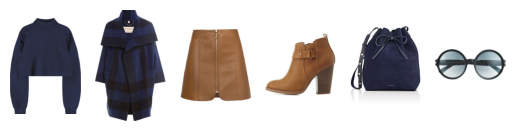

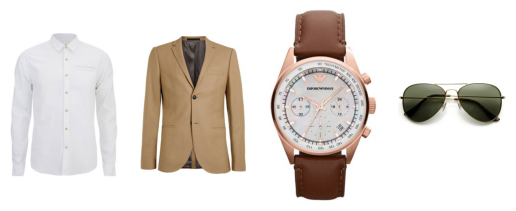

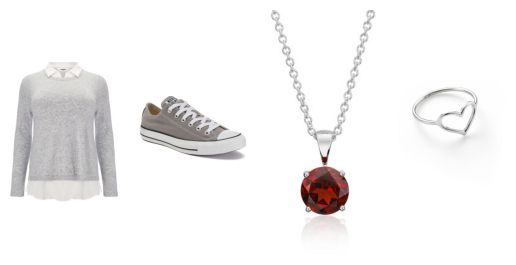

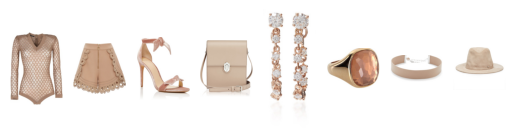

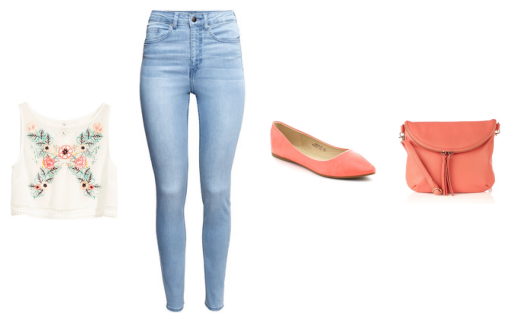

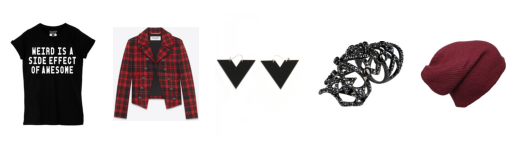

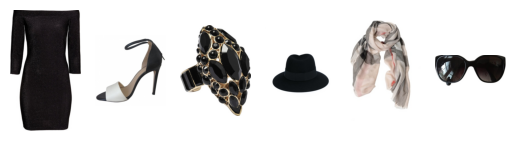

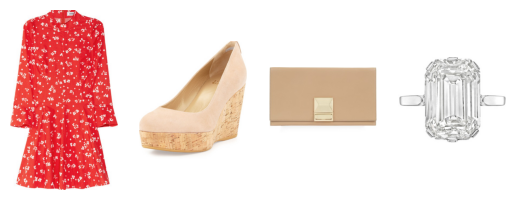

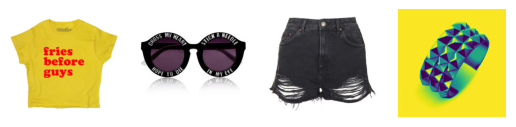

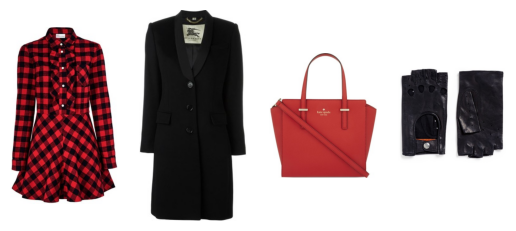

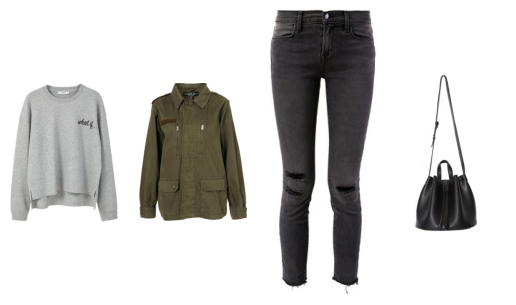

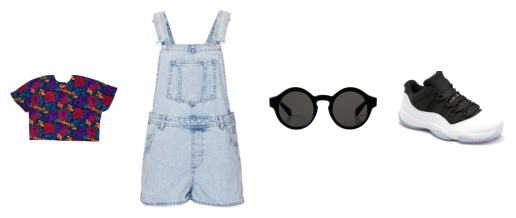

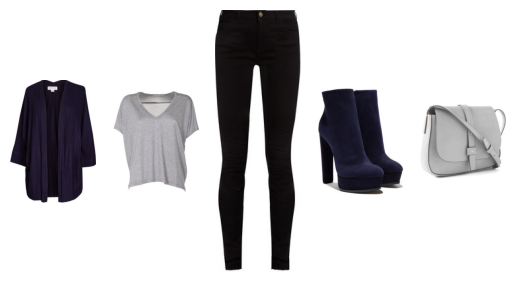

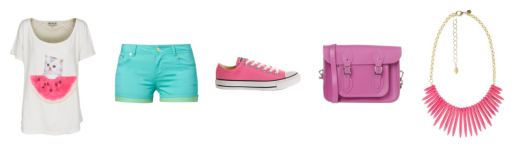

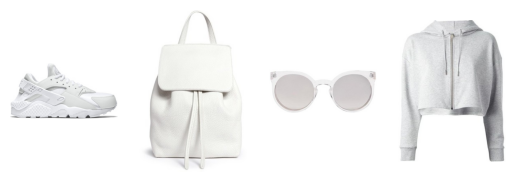

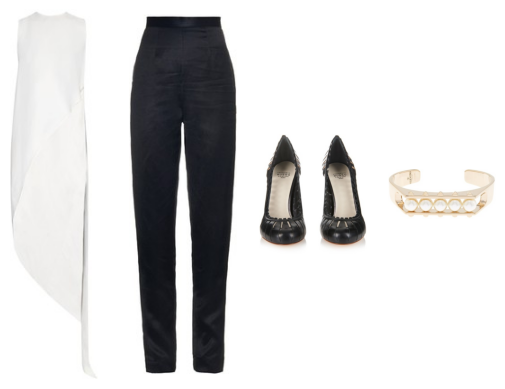

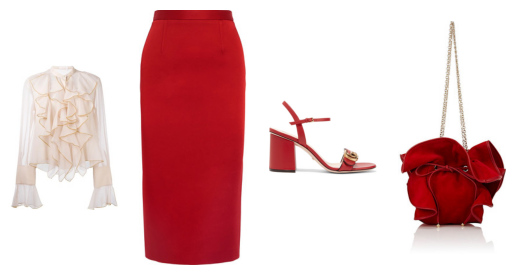

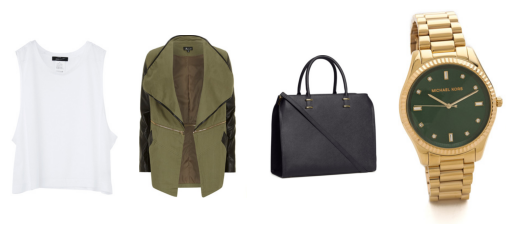

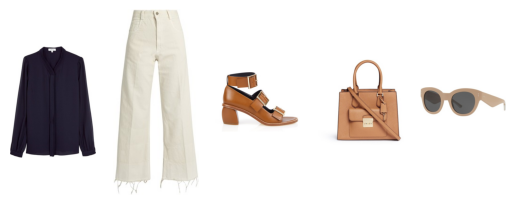

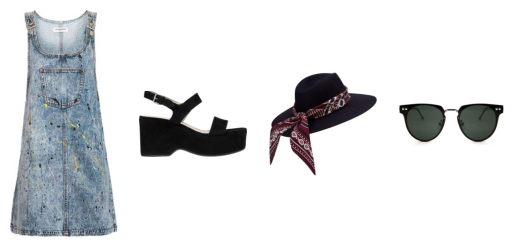

In [22]:
import random


def display_outfit(df, n=20):
    all_cleaned_set_ids = list(set(df['set_id']))
    set_ids = random.sample(all_cleaned_set_ids, n)
    outfit_count = 0
    print(f'random sample of {n} outfits from a total of {len(all_cleaned_set_ids)}')

    for set_id in set_ids:

        items = df[df['set_id'] == set_id]

        img_index = 0
        f, axarr = plt.subplots(1, len(items))

        for index, item in items.iterrows():
            img = mpimg.imread(
                f'../datasets/raw/images/{str(set_id)}/{str(item["clothingItemIndex"])}.jpg'
            )
            ax = axarr[img_index]

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # X AXIS -BORDER
            ax.spines['bottom'].set_visible(False)
            # BLUE
            ax.set_xticklabels([])
            # RED
            ax.set_xticks([])
            # RED AND BLUE TOGETHER
            ax.axes.get_xaxis().set_visible(False)

            # Y AXIS -BORDER
            ax.spines['left'].set_visible(False)
            # YELLOW
            ax.set_yticklabels([])
            # GREEN
            ax.set_yticks([])
            # YELLOW AND GREEN TOGHETHER
            ax.axes.get_yaxis().set_visible(False)

            ax.imshow(img)

            img_index += 1

        outfit_count += 1

        if outfit_count >= n:
            break


display_outfit(df_only_assigned_types_no_type_duplicates)






# from enum import Enum
#
#
# class WearType(Enum):
#     accessoire = 1
#     accessoire = 1
#
#
# wear_type_mapping = {
#     'bag': 'accessoire',
#     'brooch': None,
#     'earrings': 'accessoire',
#     'gloves': 'accessoire',
#     'hats': None,
#     'legwear': None,
#     'neckwear': None,
#     'pants': None,
#     'shoes': None,
#     'top': None,
#     'bracelet': None,
#     'dress': None,
#     'eyewear': None,
#     'hairwear': None,
#     'jumpsuit': None,
#     'necklace': None,
#     'outwear': None,
#     'rings': None,
#     'skirt': None,
#     'watches': None
# }
